In [25]:
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [26]:
X, y = make_regression(n_samples=10000, n_features=100, n_informative=10, random_state=0, shuffle=False)
print(X.shape)
print(y.shape)

(10000, 100)
(10000,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
forest = RandomForestRegressor(n_estimators=100)
mlp = MLPRegressor(max_iter=500)

In [29]:
%%time
forest.fit(X_train, y_train)

Wall time: 52.3 s


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [30]:
%%time
mlp.fit(X_train, y_train)

Wall time: 13 s


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [31]:
X_test = X_test[np.argsort(y_test)]
y_test = np.sort(y_test)

In [32]:
y_for = forest.predict(X_test)
y_mlp = mlp.predict(X_test)

forest_dev = np.sum(np.square(y_for-y_test))
mlp_dev = np.sum(np.square(y_mlp-y_test))

print(forest_dev)
print(mlp_dev)

18989970.109002214
25559.214462043645


In [45]:
print(y_test[:5])
print(y_mlp[:5])
print(y_for[:5])

[-688.05874368 -632.73137581 -604.48823279 -556.92370021 -546.66450855]
[-686.44599668 -630.94074023 -602.87289078 -556.17799822 -546.83445123]
[-282.85289055 -419.49241356 -330.86225834 -392.23736247 -351.99449247]


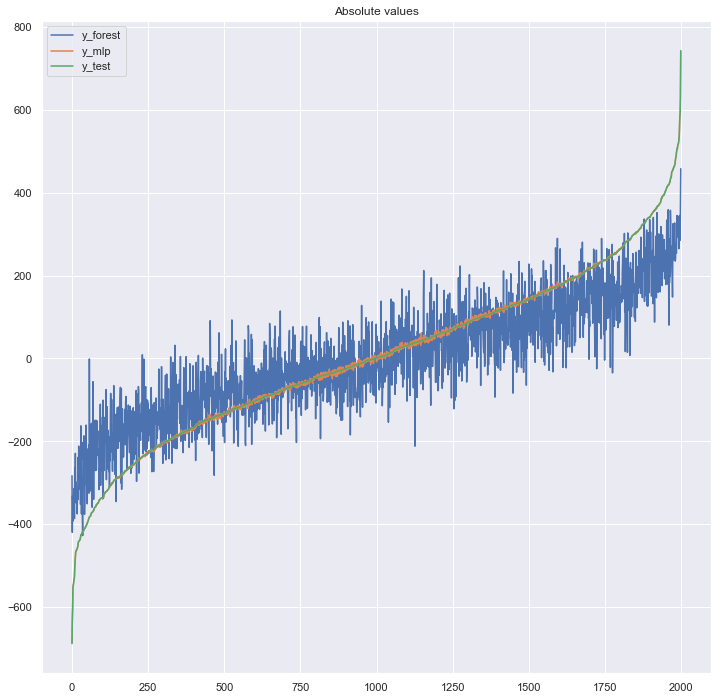

In [50]:
plt.figure(figsize=(12,12))
plt.title('Absolute values')
plt.plot(range(len(y_for)), y_for, label='y_forest')
plt.plot(range(len(y_for)), y_mlp, label='y_mlp')
plt.plot(range(len(y_for)), y_test, label='y_test')
plt.legend()
plt.show()

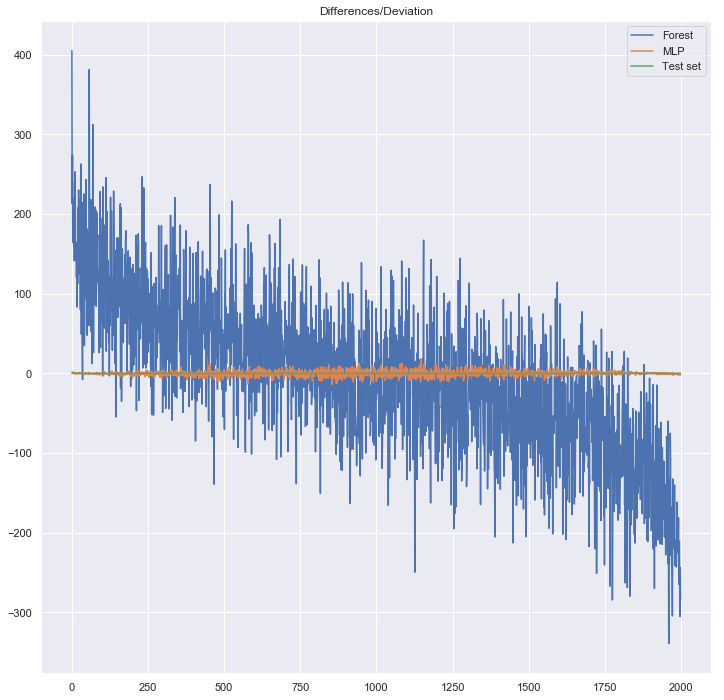

In [54]:
plt.figure(figsize=(12,12))
plt.title('Differences/Deviation')
plt.plot(range(len(y_for)), y_for-y_test, label='Forest')
plt.plot(range(len(y_for)), y_mlp-y_test, label='MLP')
plt.plot(range(len(y_for)), y_test-y_test, label='Test set')
plt.legend()
plt.show()

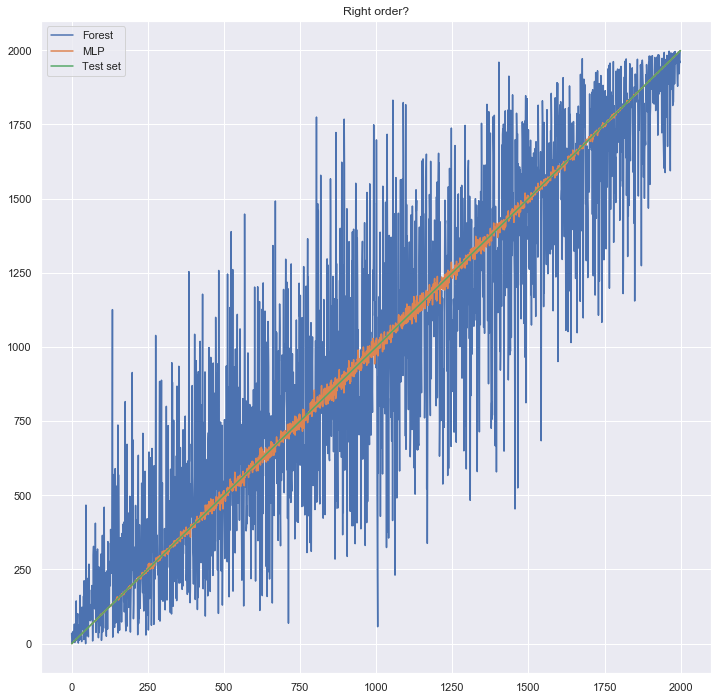

In [52]:
plt.figure(figsize=(12,12))
plt.title('Right order?')
plt.plot(range(len(y_for)),np.argsort(y_for), label='Forest')
plt.plot(range(len(y_mlp)),np.argsort(y_mlp), label='MLP')
plt.plot(range(len(y_test)),np.argsort(y_test), label='Test set')
plt.legend()
plt.show()